<a href="https://colab.research.google.com/github/RandivCosta/data-analysis/blob/main/Comparative_kruskal_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative analysis

### Kruskal-Wallis test to compare each total bacterial counts between three sites (independent samples)

In [ ]:
import pandas as pd
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# output_dir = "kruskal"
# os.makedirs(output_dir, exist_ok=True)

df = pd.read_csv('adjusted_data.csv')

seawater = df[df['Area'] == 'Sea Water']
sand = df[df['Area'] == 'Sand']
bacteria_list = df.columns[df.columns.str.contains('BC-')].tolist()

### interpreting results:
null hypothesis (H0): "All sites have the same median bacterial count"\
alternative hypothesis (H1): At least one site differs\
if p-value < 0.05, reject H0 (significant difference)\
if p-value ≥ 0.05, fail to reject H0 (no significant difference)


## for sea water

In [ ]:
print("---- Seawater Results ----")
for bacteria in bacteria_list:
    # group data by site
    site1 = seawater[seawater['Site'] == 'Site 1'][bacteria]
    site2 = seawater[seawater['Site'] == 'Site 2'][bacteria]
    site3 = seawater[seawater['Site'] == 'Site 3'][bacteria]

    # Kruskal-Wallis test
    stat, p_value = kruskal(site1, site2, site3)

    print(f"{bacteria}: H-stat = {stat:.3f}, p = {p_value:.3f}")
    if p_value < 0.05:
        print("There is a Significant difference between sites (p < 0.05)")
    else:
        print("No significant difference (p ≥ 0.05)")

---- Seawater Results ----
BC-Enterococcus (CFU/100ml): H-stat = 2.934, p = 0.231
No significant difference (p ≥ 0.05)
BC-Fecal Coliform(CFU/100ml): H-stat = 4.250, p = 0.119
No significant difference (p ≥ 0.05)
BC-E-Coli (CFU/100ml): H-stat = 4.151, p = 0.125
No significant difference (p ≥ 0.05)


## for sand

In [ ]:
print("\n---- Sand Results ----")
for bacteria in bacteria_list:
    # group data by site
    site1 = sand[sand['Site'] == 'Site 1'][bacteria]
    site2 = sand[sand['Site'] == 'Site 2'][bacteria]
    site3 = sand[sand['Site'] == 'Site 3'][bacteria]

    # Kruskal-Wallis test
    stat, p_value = kruskal(site1, site2, site3)

    print(f"{bacteria}: H-stat = {stat:.3f}, p = {p_value:.3f}")
    if p_value < 0.05:
        print("There is a Significant difference between sites (p < 0.05)")
    else:
        print("No significant difference (p ≥ 0.05)")


---- Sand Results ----
BC-Enterococcus (CFU/100ml): H-stat = 2.741, p = 0.254
No significant difference (p ≥ 0.05)
BC-Fecal Coliform(CFU/100ml): H-stat = 2.828, p = 0.243
No significant difference (p ≥ 0.05)
BC-E-Coli (CFU/100ml): H-stat = 2.528, p = 0.283
No significant difference (p ≥ 0.05)


## Visualizing with boxplots

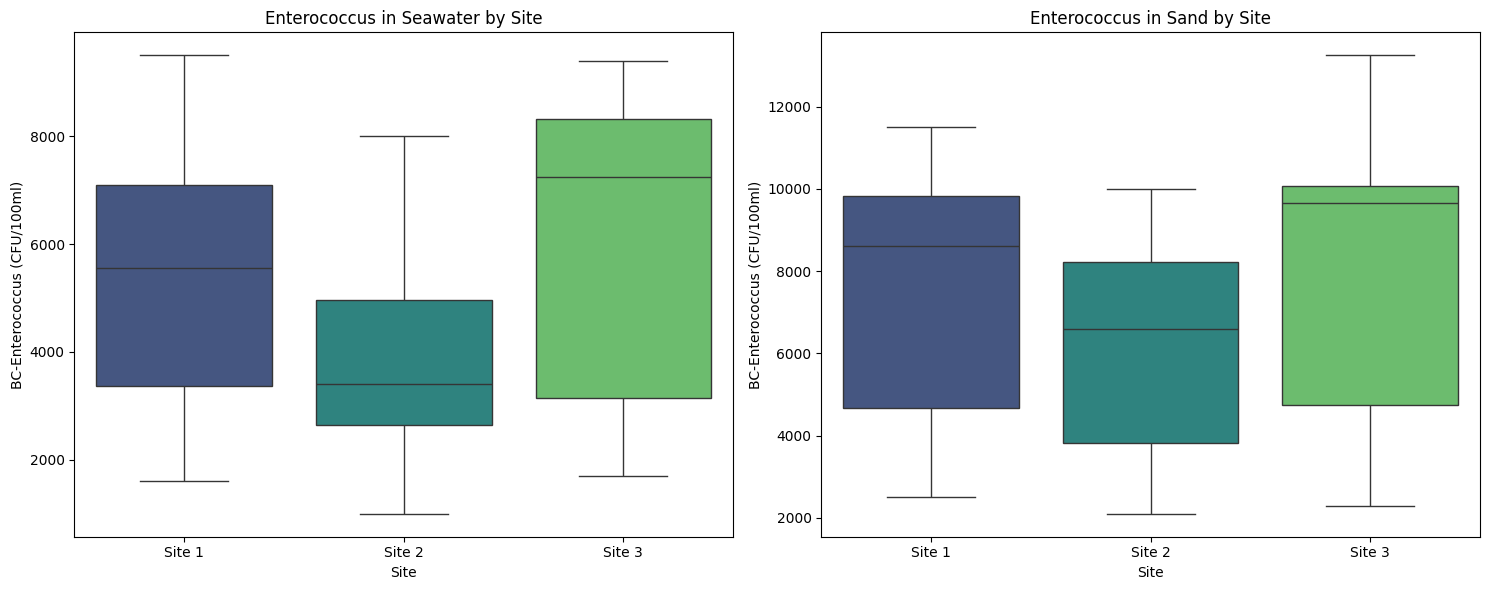

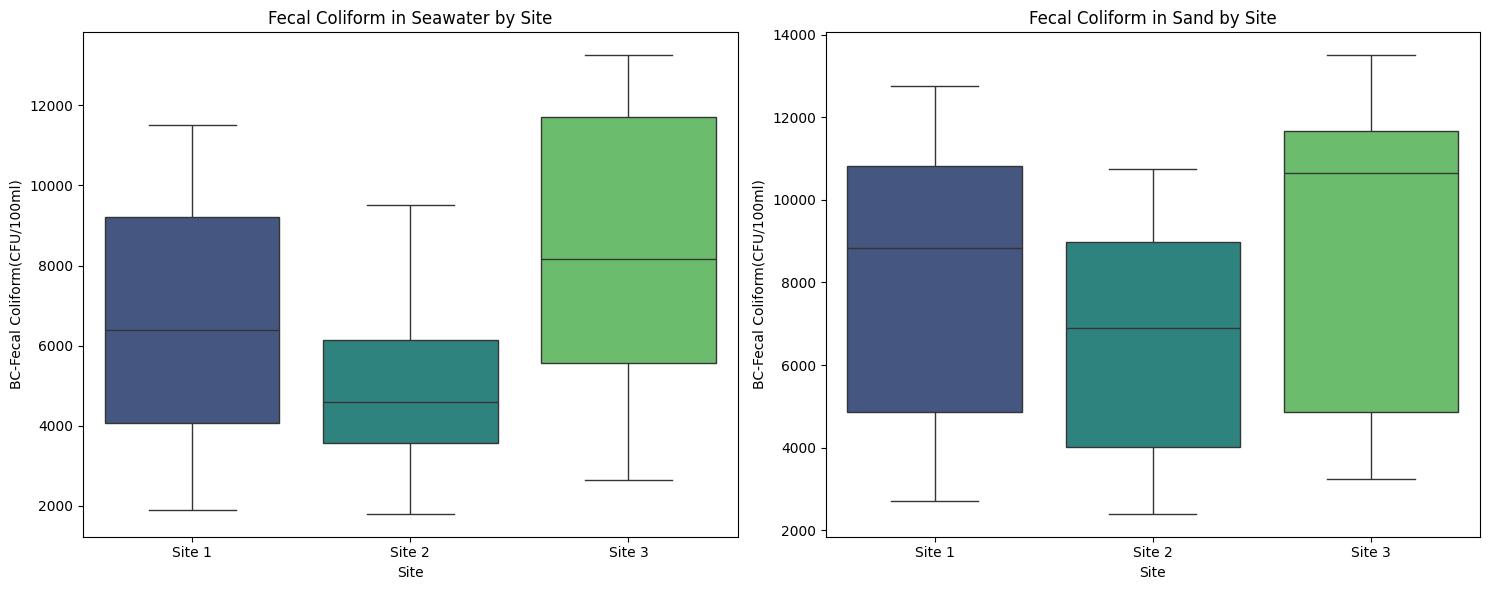

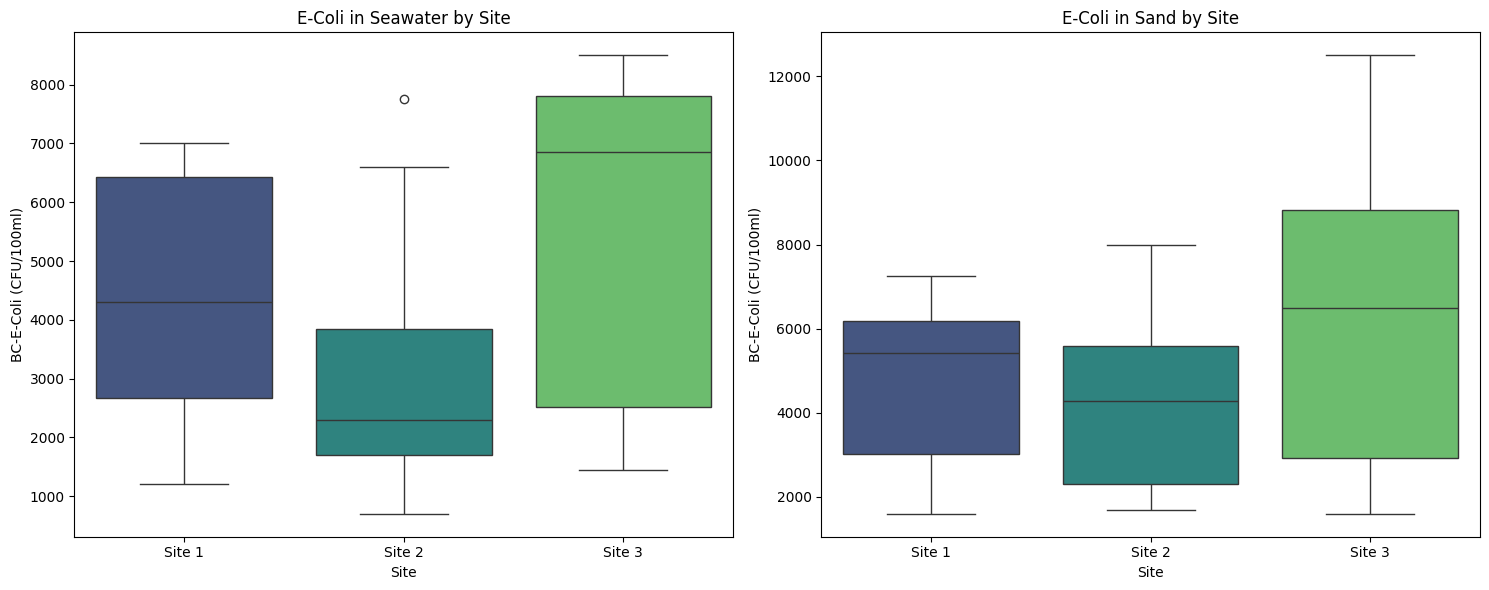

In [ ]:
plt.figure(figsize=(15, 6))

# for seawater
plt.subplot(1, 2, 1)
sns.boxplot(x='Site', y=bacteria_list[0], hue='Site', data=seawater, palette='viridis', legend=False)
plt.title('Enterococcus in Seawater by Site')

# for sand
plt.subplot(1, 2, 2)
sns.boxplot(x='Site', y=bacteria_list[0], hue='Site', data=sand, palette='viridis', legend=False)
plt.title('Enterococcus in Sand by Site')

plt.tight_layout()
plt.show()
# plt.savefig(f'{output_dir}/boxplot_{bacteria_list[0].replace('/', '_')}.png', dpi=300, bbox_inches='tight')
# plt.close()




plt.figure(figsize=(15, 6))

# for seawater
plt.subplot(1, 2, 1)
sns.boxplot(x='Site', y=bacteria_list[1], hue='Site', data=seawater, palette='viridis', legend=False)
plt.title('Fecal Coliform in Seawater by Site')

# for sand
plt.subplot(1, 2, 2)
sns.boxplot(x='Site', y=bacteria_list[1], hue='Site', data=sand, palette='viridis', legend=False)
plt.title('Fecal Coliform in Sand by Site')

plt.tight_layout()
plt.show()
# plt.savefig(f'{output_dir}/boxplot_{bacteria_list[1].replace('/', '_')}.png', dpi=300, bbox_inches='tight')
# plt.close()




plt.figure(figsize=(15, 6))

# for seawater
plt.subplot(1, 2, 1)
sns.boxplot(x='Site', y=bacteria_list[2], hue='Site', data=seawater, palette='viridis', legend=False)
plt.title('E-Coli in Seawater by Site')

# for sand
plt.subplot(1, 2, 2)
sns.boxplot(x='Site', y=bacteria_list[2], hue='Site', data=sand, palette='viridis', legend=False)
plt.title('E-Coli in Sand by Site')

plt.tight_layout()
plt.show()
# plt.savefig(f'{output_dir}/boxplot_{bacteria_list[2].replace('/', '_')}.png', dpi=300, bbox_inches='tight')
# plt.close()